# Домашнее задание №4 (Семинар_4)

## Задание 1. 
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/esratmaria/house-price-dataset-with-other-information

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости


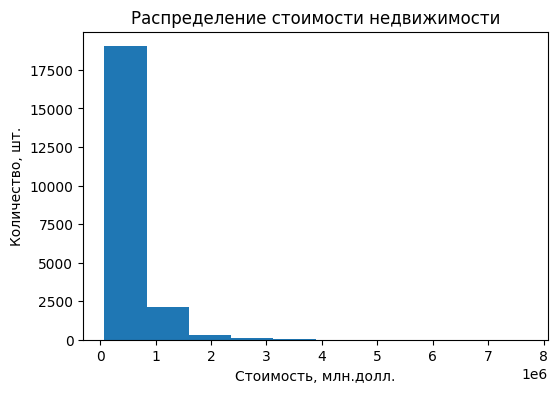

In [88]:
plt.figure(figsize=(6, 4))
plt.hist(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость, млн.долл.')
plt.ylabel('Количество, шт.');

### 1.3 Изучите распределение квадратуры жилой площади

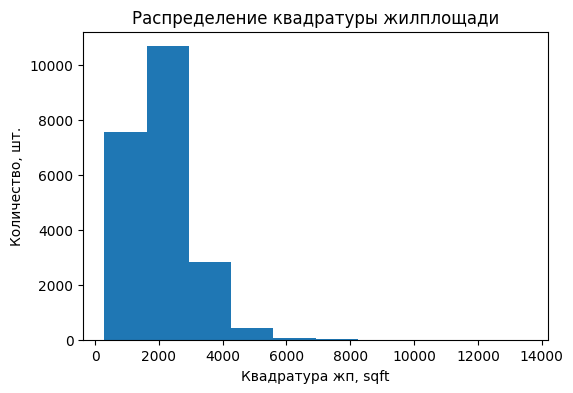

In [89]:
plt.figure(figsize=(6, 4))
plt.hist(df['sqft_living'])
plt.title('Распределение квадратуры жилплощади')
plt.xlabel('Квадратура жп, sqft')
plt.ylabel('Количество, шт.');

### 1.4 Изучите распределение года постройки

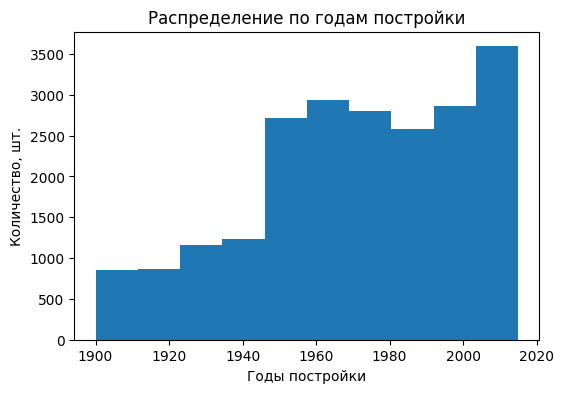

In [90]:
plt.figure(figsize=(6, 4))
plt.hist(df['yr_built'])
plt.title('Распределение по годам постройки')
plt.xlabel('Годы постройки')
plt.ylabel('Количество, шт.');

## Задание 2.
- Постройте график
- Сделайте выводы
### 2.1 Изучите распределение домов от наличия вида на набережную

0    21450
1      163
Name: waterfront, dtype: int64


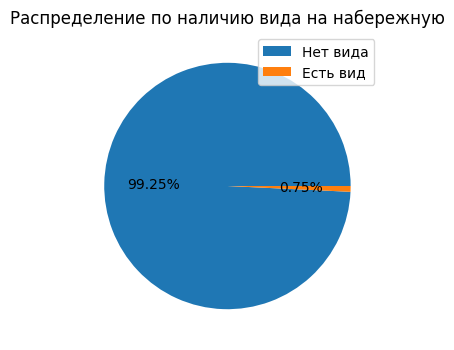

In [91]:
data = df['waterfront'].value_counts()
print (data)
names = data.index
values = data.values

plt.figure(figsize=(6, 4))
plt.title('Распределение по наличию вида на набережную')
plt.pie(values, autopct='%.2f%%')
plt.legend(['Нет вида', 'Есть вид']);

### 2.2 Изучите распределение этажей домов

1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: floors, dtype: int64


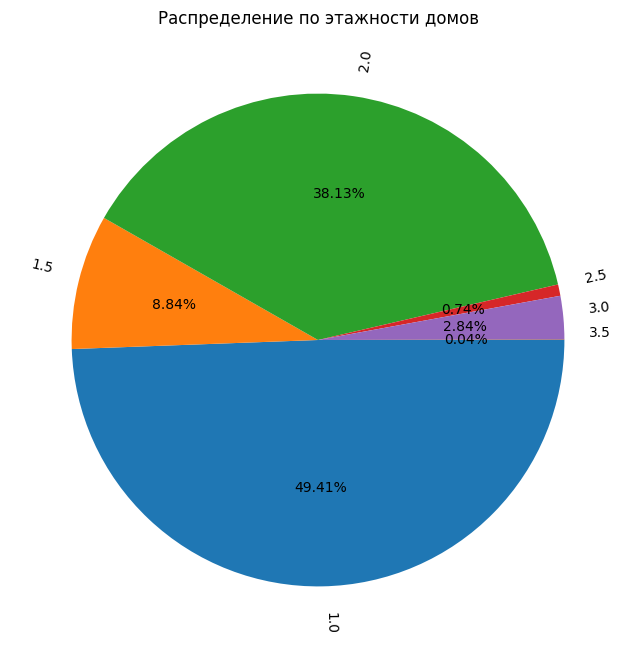

In [92]:
data = df['floors'].value_counts().sort_index()
print (data)
names = data.index
values = data.values

plt.figure(figsize=(8, 8))
plt.title('Распределение по этажности домов')
plt.pie(values, autopct='%.2f%%', labels = names, rotatelabels=True, counterclock=False);

### 2.3 Изучите распределение состояния домов

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64


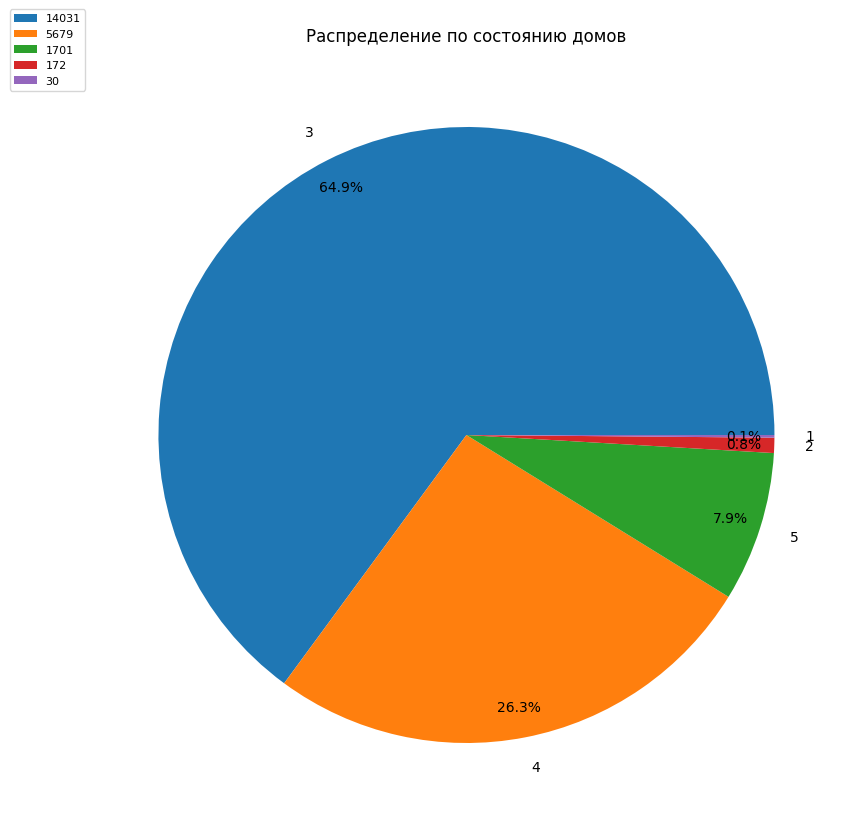

In [93]:
data = df['condition'].value_counts()
print (data)
names = data.index
values = data.values

plt.figure(figsize=(10,10))
plt.title('Распределение по состоянию домов')
plt.pie(values, autopct='%.1f%%', labels = names, pctdistance=0.9);
plt.legend(values, loc='center left', fontsize=8, bbox_to_anchor=(-0.1, 1.));

## Задание 3.
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате **storytelling**: дополнить каждый график письменными выводами и наблюдениями.

#### Выявление попарных линейных зависимостей различных параметров недвижимости

С помощью корреляционной матрицы выявим, имеет ли линейное влияние на цену недвижимости каждый из параметров.

In [94]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

C:\Users\parkl\AppData\Local\Temp\ipykernel_8828\4194942596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:title={'center':'Корреляционная матрица попарных линейных зависимостей исследуемых параметров'}>

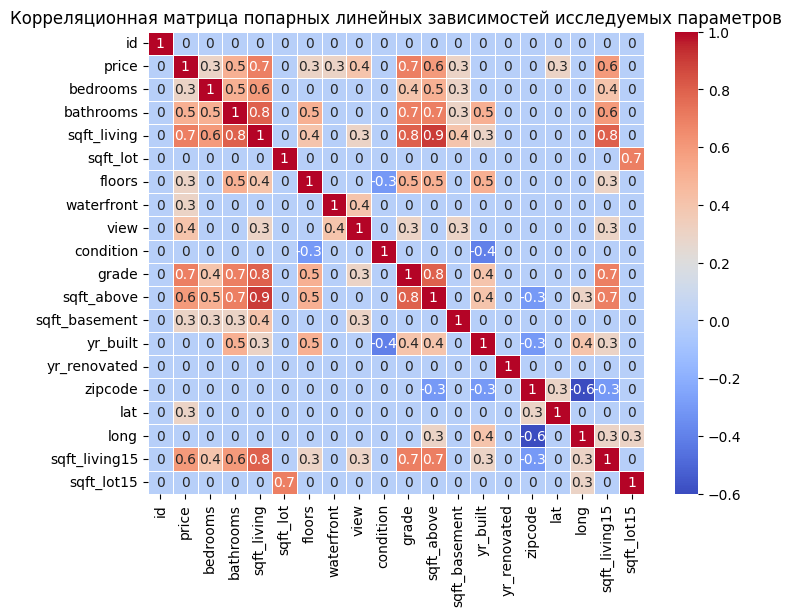

In [95]:
plt.figure(figsize=(8,6))
plt.title('Корреляционная матрица попарных линейных зависимостей исследуемых параметров')
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm')

#### Выводы: 

Наибольшее влияние на цену недвижимости оказывают следующие параметры (в порядке убывания влияния):
- размер жилой площади
- качество конструкции здания и его дизайна
- размер площади надземной части дома (как следствие сильной зависимоти от параметра жилой площади)
- размер жилой площади у 15 соседей (как следствие сильной зависимоти от параметра жилой площади)
- количество ванных комнат (как следствие сильной зависимоти от параметра жилой площади)
- оценочная характеристика вида
- количество спален
- этажность дома
- наличие набережной
- наличие подвала и его размер
- географическая широта
Остальные параметры имеют либо очень слабое линейное влияние на цену либо их зависимость не является линейной.

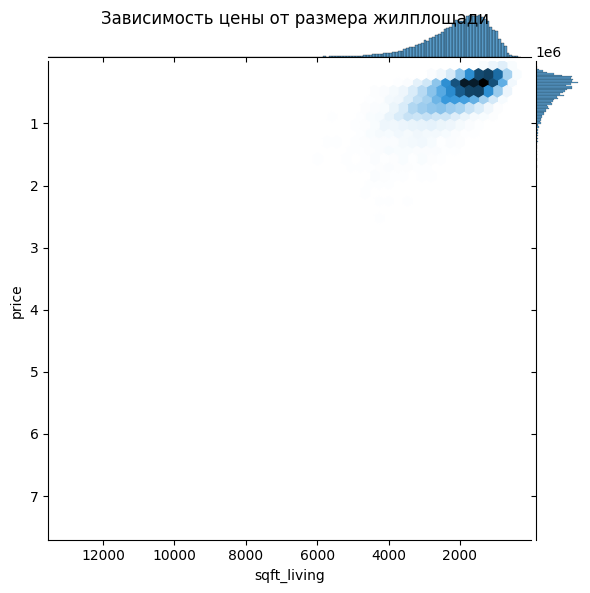

In [96]:
# # plt.figure(figsize=(10,4))
# plt.title('Зависимость цены от размера жилплощади')
plot = sns.jointplot(x=df['sqft_living'], y=df['price'], kind='hex', height=6, ratio=10, space=0.1, xlim=df['sqft_living'].max(), ylim=df['price'].max())
plot.fig.suptitle("Зависимость цены от размера жилплощади");

#### Выводы: 
Наиболее покупаемая недвижимость - это дома стоимостью 250000 - 700000 долларов с жилой площадью 1000-2500 кв.футов.

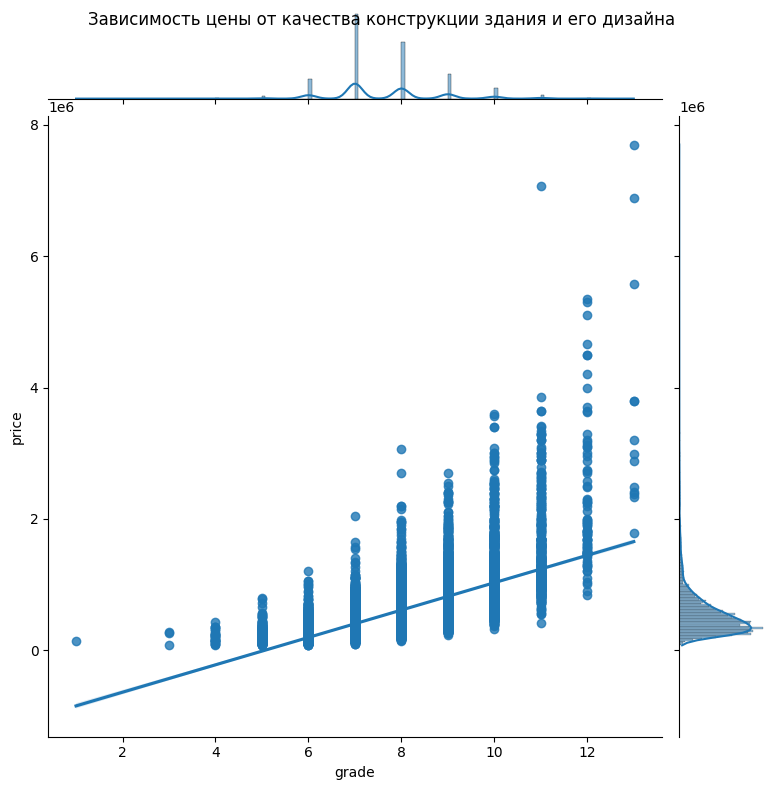

In [97]:
plot = sns.jointplot(x=df['grade'], y=df['price'], kind='reg', height=8, ratio=6, space=0.2)
plot.fig.suptitle("Зависимость цены от качества конструкции здания и его дизайна");
# df['price'].median()

#### Выводы: 
Наиболее популярные у покупателей дома имеют градацию от 6 до 9 из 13 по критерию качества конструкции здания и его дизайна и цену ок.450000долларов. 

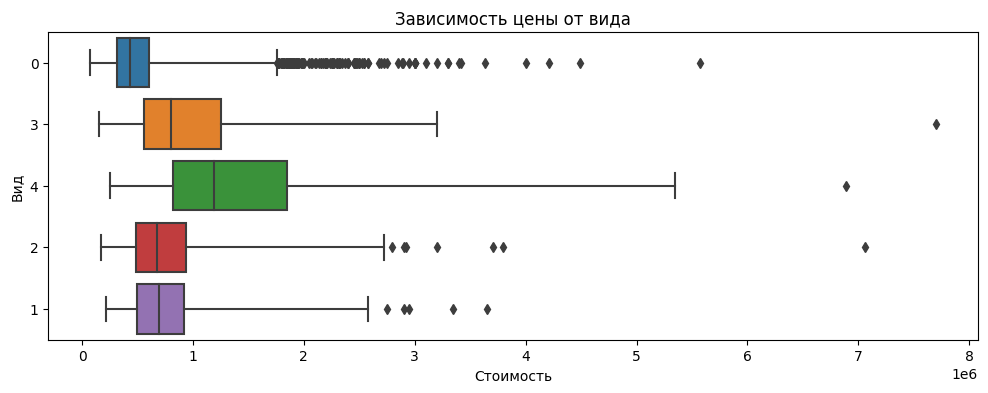

In [98]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df['price'], y=df['view'].astype(str), whis=4)

plt.title('Зависимость цены от вида')
plt.xlabel('Стоимость')
plt.ylabel('Вид');


Чаще всего покупаемыми оказались дома с очень хорошим видом, но при этом они оказались дороже домов с худшим видом. Чем хуже вид - тем ниже цена.

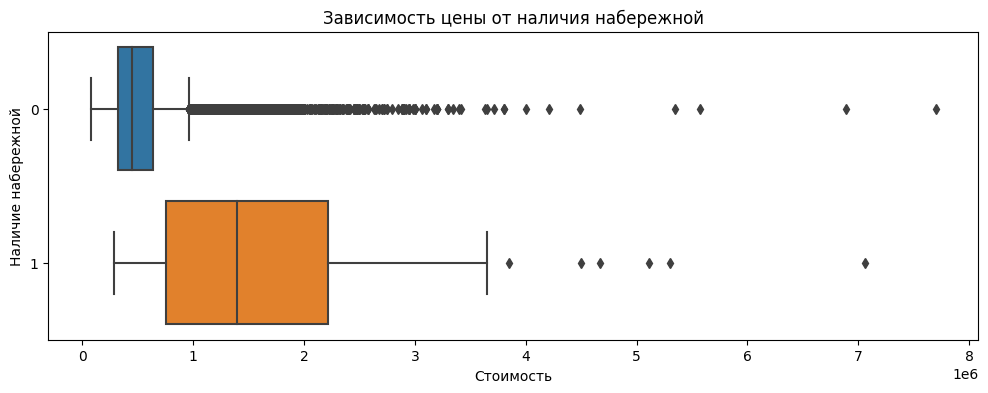

In [99]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1)

plt.xlabel('Стоимость')
plt.ylabel('Наличие набережной')
plt.title('Зависимость цены от наличия набережной');

#### Выводы: 
Более дорогими оказались дома на набережной. Также можно отметить, что дома без набережной представлены во всех ценовых диапазонах, но при этом максимальное их наличие приходится на самый дешевый сегмент.